# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data Set(s)

In [2]:
# Creating a path variable as a short cut for future importing of data
path = r'/Users/tuor/DA Projects/230321 Instacart Basket Analysis'

In [4]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '230331_orders_products_customers_merged.pkl'))

In [20]:
customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '230330_customers.pkl'))

# 03. Charts

## 03.1 Histogram

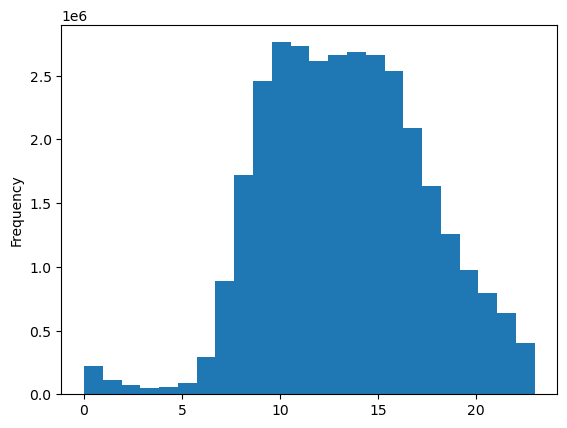

In [7]:
# histogram of order_hour of _day
hist_hours = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

The histogram above indicates that the greatest frequency of activity 1.5le6 or higher occurs between 9am and 7pm. Consistent maximum of roughly 2.5le6  or higher between 10am and 5pm.

## 03.2 Bar

In [10]:
# Creating a bar chart of days of the week with sorting to give the index order and color
customer_loyalty = ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['Green', 'Orange', 'Blue'])

## 03.3 Line

In [11]:
# Creating a list holding True/False values to the test np.random.rant( <= 0.7)
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [12]:
# Storing 70% of the sample in the dataframe big
big = ords_prods_cust[dev]

In [13]:
# Storing 30% of the sample in the dataframe small

small = ords_prods_cust[~dev]

In [14]:
len(ords_prods_cust)

32406041

In [15]:
len(big) + len(small)

32406041

### 03.3.1 Order_hour_of_day vs prices

In [16]:
# Selecting only the columns needed to improve processing time
df_2 = small[['order_hour_of_day','prices']]

In [17]:
# Line plot of order_hour_of_day vs prices
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

The line chart above indicates a drop in average price of purchased products between 8am and 2pm. The shaded area around the line is the 95% confidence interval of where the actual value would be showing we are more confident with the data after 6am.

### 03.3.2 Customer age and number of dependents

In [22]:
# Determining if a sample needs to be taken based on size of data frame
customer.shape

(206209, 10)

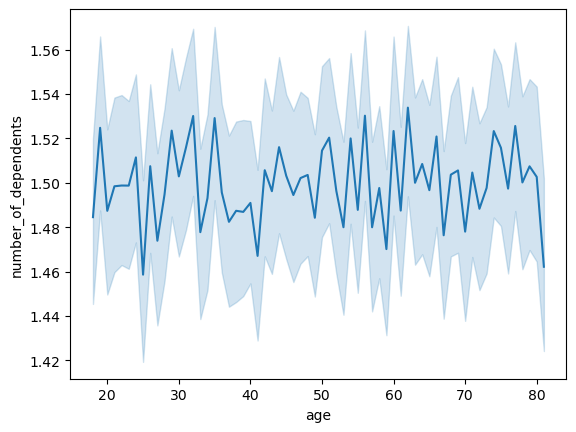

In [21]:
# Line plot of order_hour_of_day vs prices
line_age_n_dep = sns.lineplot(data = customer, x = 'age',y = 'number_of_dependents')

From the line chart above, there is no clear relationship between age and number of dependents

# 03.4 Scatter Plot

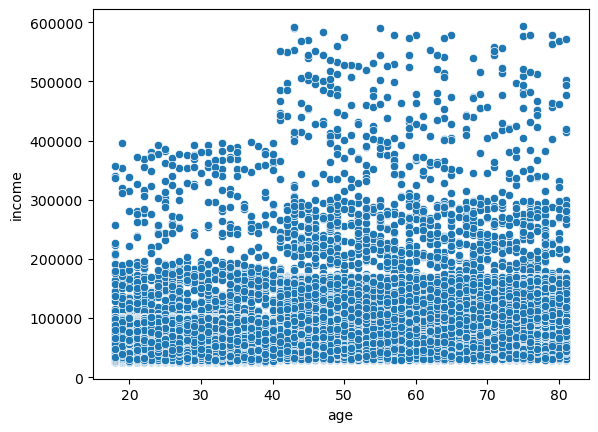

In [24]:
age_income = sns.scatterplot(x = 'age', y = 'income',data = customer)

The scatter plot shows that as age go up there is a larger density of individuals with higher incomes. Notably no one below 40 has broken 400000 a year and the general density of 200000 to 300000 increases past 40 as well.

# 04. Exporting Plots

In [25]:
# Saving the figure to Visualizations folder
hist_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours_of_day.png'))

In [26]:
# Saving the figure to Visualizations folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours_of_day_and_prices.png'))

In [27]:
# Saving the figure to Visualizations folder
line_age_n_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_n_dependents.png'))

In [28]:
# Saving the figure to Visualizations folder
age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot_age_and_income.png'))